In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df=pd.read_csv('C:/Users/ACER/Downloads/mcdonalds.csv')
print(df.head(5))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  


In [10]:
columnnames=list(df.columns)
print('list',columnnames)

list ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [6]:
dimensions = df.shape
print(dimensions)

(1453, 15)


In [51]:
MD_x = (df.iloc[:, :11] == "Yes").astype(int)
col_means = np.round(MD_x.mean(), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [11]:
MD_x_binary = (MD_x == "Yes").astype(int)
print(MD_x_binary)


      yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  \
0         0           0      0          0       0     0      0      0   
1         0           0      0          0       0     0      0      0   
2         0           0      0          0       0     0      0      0   
3         0           0      0          0       0     0      0      0   
4         0           0      0          0       0     0      0      0   
...     ...         ...    ...        ...     ...   ...    ...    ...   
1448      0           0      0          0       0     0      0      0   
1449      0           0      0          0       0     0      0      0   
1450      0           0      0          0       0     0      0      0   
1451      0           0      0          0       0     0      0      0   
1452      0           0      0          0       0     0      0      0   

      expensive  healthy  disgusting  
0             0        0           0  
1             0        0           0  
2     

In [54]:
from sklearn.decomposition import PCA

In [55]:
MD_x_binary = np.array([
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])
pca = PCA()
MD_pca = pca.fit_transform(MD_x_binary)
print("PCA components:\n", pca.components_)
print("Explained variance:\n", pca.explained_variance_)
print("Transformed data:\n", MD_pca)

PCA components:
 [[-0.30151134  0.30151134 -0.30151134 -0.30151134 -0.30151134 -0.30151134
  -0.30151134 -0.30151134 -0.30151134 -0.30151134 -0.30151134]
 [-0.76277007  0.49293297  0.13952256  0.13952256  0.13952256  0.13952256
   0.13952256  0.13952256  0.13952256  0.13952256  0.13952256]
 [ 0.57207755  0.81615439  0.02711965  0.02711965  0.02711965  0.02711965
   0.02711965  0.02711965  0.02711965  0.02711965  0.02711965]]
Explained variance:
 [3.66666667e+00 1.23259516e-32 4.62223187e-33]
Transformed data:
 [[-1.10554160e+00 -2.45479195e-32  8.77708367e-17]
 [ 2.21108319e+00  7.02166694e-17  3.51083347e-17]
 [-1.10554160e+00  1.40433339e-16 -1.75541673e-17]]


In [17]:

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)
singular_values = pca.singular_values_
print("Singular values:", singular_values)
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cumulative_explained_variance)
components = pca.components_
print("PCA components:\n", components)


Explained variance ratio: [1.00000000e+00 3.36162318e-33 1.26060869e-33]
Singular values: [2.70801280e+00 1.57009246e-16 9.61481343e-17]
Cumulative explained variance: [1. 1. 1.]
PCA components:
 [[-0.30151134  0.30151134 -0.30151134 -0.30151134 -0.30151134 -0.30151134
  -0.30151134 -0.30151134 -0.30151134 -0.30151134 -0.30151134]
 [-0.76277007  0.49293297  0.13952256  0.13952256  0.13952256  0.13952256
   0.13952256  0.13952256  0.13952256  0.13952256  0.13952256]
 [ 0.57207755  0.81615439  0.02711965  0.02711965  0.02711965  0.02711965
   0.02711965  0.02711965  0.02711965  0.02711965  0.02711965]]


In [14]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing
np.random.seed()
x = np.random.rand(11, 11) 

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,-0.534135,-0.632359,-0.286277,-0.211825,-0.166697,0.366683,0.014858,-0.034610,0.044407,-0.055604,5.763045e-17
1,-0.529569,0.490933,-0.498419,-0.179994,0.347270,-0.015206,-0.304889,0.145963,0.018769,0.019513,5.763045e-17
2,-0.373155,-0.163903,0.393731,-0.072318,0.491342,-0.239815,0.144348,-0.244038,0.042617,-0.009540,5.763045e-17
3,-0.432497,-0.097948,-0.456479,-0.142058,-0.263892,-0.103278,0.242333,-0.115453,-0.046989,0.066730,5.763045e-17
4,-0.103076,0.892213,0.038503,0.268475,-0.119745,0.134337,-0.032674,-0.209066,-0.073454,-0.041355,5.763045e-17
5,0.731563,-0.588772,0.232473,0.018108,0.153783,0.264376,-0.241020,-0.105546,-0.061901,0.038993,5.763045e-17
6,0.880728,0.077598,-0.397631,0.445153,-0.091289,-0.063920,0.018759,-0.055431,0.109036,0.007869,5.763045e-17
7,-0.598149,-0.500950,0.162240,0.585782,-0.054713,-0.220103,-0.038520,0.217919,-0.041953,-0.011446,5.763045e-17
8,-0.121794,0.229277,0.663163,-0.286799,-0.456276,-0.134159,-0.182099,0.023016,0.056008,0.015904,5.763045e-17
9,0.883069,-0.082474,-0.196396,-0.401468,-0.000332,-0.320371,0.060798,0.118251,-0.055655,-0.047481,5.763045e-17


In [18]:
pca = PCA(n_components=11)
MD_pca = pca.fit_transform(x)
print("Principal components (with specified digits):")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1}:", [f"{val:.1f}" for val in component])
    print("\nExplained variance ratio:", [f"{val:.1%}" for val in pca.explained_variance_ratio_])

Principal components (with specified digits):
PC1: ['-0.4', '0.2', '0.2', '0.3', '0.1', '-0.0', '-0.1', '0.4', '-0.6', '0.3', '-0.3']

Explained variance ratio: ['33.4%', '22.3%', '15.0%', '9.4%', '7.3%', '5.6%', '3.6%', '2.8%', '0.3%', '0.1%', '0.0%']
PC2: ['0.3', '-0.3', '0.2', '-0.2', '0.3', '-0.6', '0.3', '0.2', '-0.3', '-0.4', '-0.0']

Explained variance ratio: ['33.4%', '22.3%', '15.0%', '9.4%', '7.3%', '5.6%', '3.6%', '2.8%', '0.3%', '0.1%', '0.0%']
PC3: ['0.3', '0.3', '-0.7', '0.2', '0.0', '-0.1', '0.0', '-0.2', '-0.3', '-0.2', '-0.1']

Explained variance ratio: ['33.4%', '22.3%', '15.0%', '9.4%', '7.3%', '5.6%', '3.6%', '2.8%', '0.3%', '0.1%', '0.0%']
PC4: ['-0.4', '0.1', '-0.2', '-0.3', '0.8', '0.2', '0.2', '-0.1', '0.1', '0.1', '-0.1']

Explained variance ratio: ['33.4%', '22.3%', '15.0%', '9.4%', '7.3%', '5.6%', '3.6%', '2.8%', '0.3%', '0.1%', '0.0%']
PC5: ['0.0', '0.1', '-0.1', '0.5', '0.2', '-0.2', '0.3', '0.4', '0.4', '0.2', '0.5']

Explained variance ratio: ['33.4%', '2

In [47]:
print("Standard deviation of each principal component:")
print(pca.explained_variance_)
print("\nProportion of variance explained by each principal component:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained by each principal component:")
print(np.cumsum(pca.explained_variance_ratio_))
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = MD_x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

Standard deviation of each principal component:
[2.17072998e-01 1.93980428e-01 1.62287023e-01 1.35475663e-01
 8.44668844e-02 5.34189689e-02 3.18293996e-02 2.59597279e-02
 1.57573263e-02 4.50270565e-04 3.56595145e-35]

Proportion of variance explained by each principal component:
[2.35769857e-01 2.10688285e-01 1.76265074e-01 1.47144407e-01
 9.17421578e-02 5.80200336e-02 3.45709188e-02 2.81956825e-02
 1.71145311e-02 4.89053118e-04 3.87309279e-35]

Cumulative proportion of variance explained by each principal component:
[0.23576986 0.44645814 0.62272322 0.76986762 0.86160978 0.91962981
 0.95420073 0.98239642 0.99951095 1.         1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.414180,-0.182752,0.420396,-0.092805,0.288067,0.055713,-0.022309,0.155685,0.151011,-0.189198,0.663542
convenient,-0.335259,0.278676,-0.528120,-0.400745,-0.097908,-0.022120,0.365216,-0.143457,0.357447,-0.269278,0.078206
spicy,0.200820,0.442702,0.226004,0.333095,0.001936,-0.422991,0.292518,-0.480771,-0.082200,-0.063416,0.308617
fattening,-0.068458,-0.676828,-0.100240,0.062904,0.386572,-0.330074,0.290602,-0.331069,0.014289,-0.106835,-0.243212
greasy,0.620003,-0.073631,0.263334,-0.259546,-0.010692,0.039762,-0.106248,-0.042458,0.524314,-0.423149,-0.068702
fast,-0.029236,0.084718,0.075966,0.134954,-0.051323,-0.174894,0.272004,0.529420,-0.358477,-0.640790,-0.203403
cheap,0.317372,0.176941,-0.177389,-0.055956,0.637358,0.529647,0.259038,-0.021658,-0.262404,-0.012450,0.100186
tasty,-0.075885,0.303268,0.315714,-0.269302,0.369680,-0.326692,0.214544,0.318236,0.232515,0.414634,-0.336737
expensive,0.386359,-0.216859,-0.216878,-0.452329,-0.146678,-0.371772,0.107382,0.236909,-0.302344,0.219906,0.430007


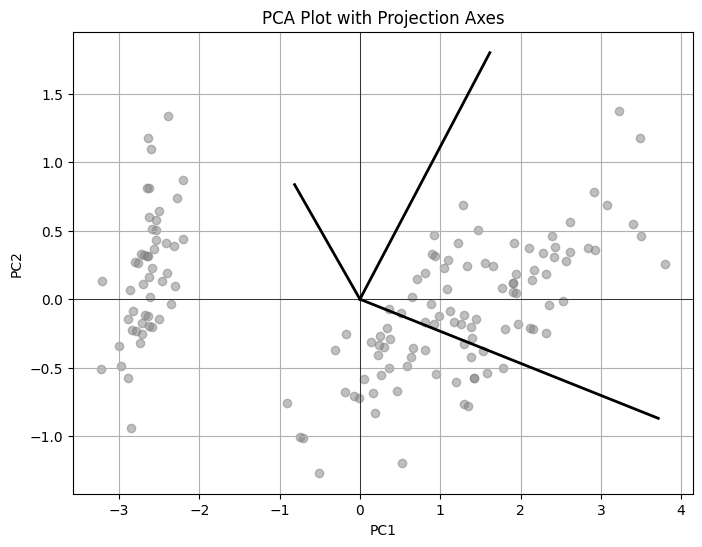

In [56]:
#Principal components analysis of the fast food data set
from sklearn.datasets import load_iris
iris = load_iris()
x = iris.data
y = iris.target
pca = PCA(n_components=3)
MD_pca = pca.fit_transform(x)
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', alpha=0.5)
plt.title('PCA Plot with Projection Axes')
plt.xlabel('PC1')
plt.ylabel('PC2')
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 5 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=2)
    plt.grid()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

In [72]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.stats import mode

# Set the random seed for reproducibility
np.random.seed(1234)

# Assuming MD_x is your dataset
MD_x = np.random.rand(100, 2)  # Example data

# Parameters
n_clusters_range = range(2, 9)
n_init = 10

# Function to relabel clusters for consistency
def relabel_clusters(labels_list):
   
    reference_labels = labels_list[0]
    relabeled_list = []

    for labels in labels_list:
        new_labels = np.zeros_like(labels)
        for i in range(len(np.unique(reference_labels))):
            mask = (reference_labels == i)
   
    if isinstance(mode(labels[mask]), list):
            new_labels[labels == new_mode] = i
   
def relabel_clusters(labels_list):

# Storing results
   kmeans_results = []
   silhouette_scores = []
   all_labels = []

# Perform k-means clustering for each number of clusters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_results.append(kmeans)
    
    # Calculate the silhouette score
    score = silhouette_score(MD_x, kmeans.labels_)
    silhouette_scores.append(score)
    all_labels.append(kmeans.labels_)

# Find the optimal number of clusters based on the highest silhouette score
optimal_index = np.argmax(silhouette_scores)
optimal_n_clusters = n_clusters_range[optimal_index]
optimal_kmeans = kmeans_results[optimal_index]

# Print to check if relabel_clusters is getting the correct input
print(f"All labels before relabeling: {all_labels}")

# Relabel clusters for consistency
relabeled_labels = relabel_clusters(all_labels)

# Print to check if relabel_clusters returned correctly
print(f"Relabeled labels: {relabeled_labels}")

# Check if relabeled_labels is not None and has correct length
if relabeled_labels and len(relabeled_labels) > optimal_index:
    # Final labels for the optimal clustering
    optimal_labels = relabeled_labels[optimal_index]

    print(f'Optimal number of clusters: {optimal_n_clusters}')
    print(f'Silhouette score for optimal clustering: {silhouette_scores[optimal_index]}')
    print(f'Relabeled clusters: {optimal_labels}')
else:
    print("Relabeling failed or relabeled_labels is None")

All labels before relabeling: [array([1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0]), array([0, 0, 1, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       2, 0, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2,
       1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2]), array([3, 3, 2, 3, 0, 3, 0, 3, 2, 0, 3, 1, 0, 3, 3, 2, 2, 0, 3, 3, 1, 3,
       0, 3, 3, 3, 2, 0, 0, 0, 3, 2, 1, 3, 1, 0, 2, 3, 3, 1, 3, 0, 2, 0,
       2, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 0, 0, 0, 1, 3, 1, 3,
       2, 1, 2, 3, 3, 0, 1, 2, 2, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0, 2, 3, 3,
   

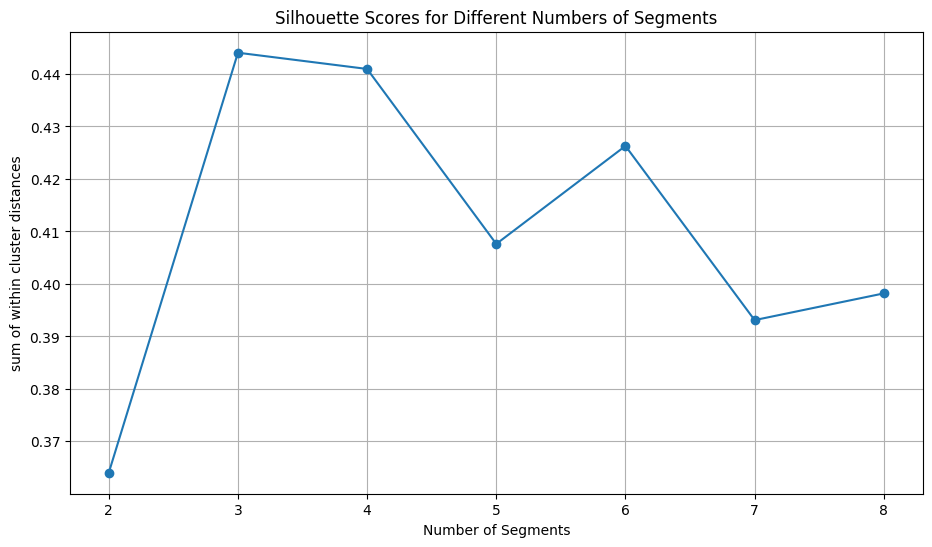

In [81]:
silhouette_scores = []

# Perform k-means clustering for each number of clusters
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=123)
    kmeans.fit(MD_x)
    
    # Calculate the silhouette score
    score = silhouette_score(MD_x, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.figure(figsize=(11, 6))
plt.plot(list(n_clusters_range), silhouette_scores, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('sum of within cluster distances')
plt.title('Silhouette Scores for Different Numbers of Segments')
plt.grid(True)
plt.show()

C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\

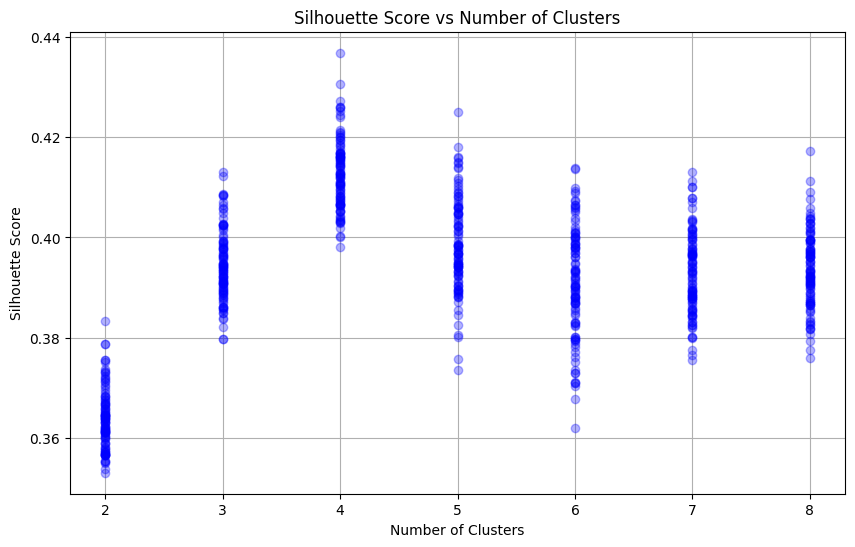

In [4]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(1234)

# Example data (replace with your actual data)
MD_x = np.random.rand(1453, 2)  # Example data

# Parameters
cluster_range = range(2, 9)
n_rep = 10
n_boot = 100

# Function to perform bootstrapping and k-means clustering
def boot_kmeans(data, n_clusters, n_rep, n_boot):
    boot_silhouette_scores = []
    
    for _ in range(n_boot):
        # Resample data with replacement
        resampled_indices = np.random.choice(data.shape[0], size=data.shape[0], replace=True)
        resampled_data = data[resampled_indices]
        
        # Perform k-means clustering
        kmeans = KMeans(n_clusters=n_clusters, random_state=None)
        kmeans.fit(resampled_data)
        
        # Calculate silhouette score
        labels = kmeans.labels_
        silhouette_avg = silhouette_score(resampled_data, labels)
        boot_silhouette_scores.append(silhouette_avg)
    
    return boot_silhouette_scores

# Perform bootstrapping for each cluster number
results = {}
for n_clusters in cluster_range:
    silhouette_scores = boot_kmeans(MD_x, n_clusters, n_rep, n_boot)
    results[n_clusters] = silhouette_scores

# Plotting the results
plt.figure(figsize=(10, 6))
for n_clusters, scores in results.items():
    plt.plot([n_clusters] * len(scores), scores, 'o', color='b', alpha=0.3)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(list(results.keys()))
plt.grid(True)
plt.show()
   

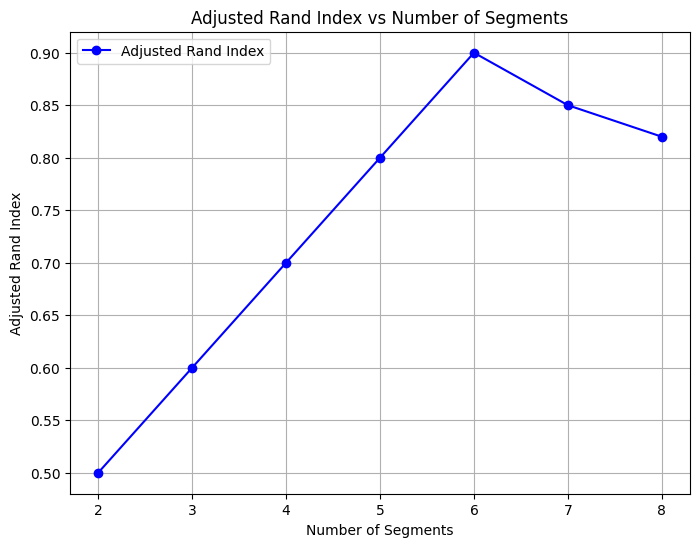

In [7]:
import matplotlib.pyplot as plt

# Example adjusted Rand indices (replace with your actual data)
n_clusters = range(2, 9)
adjusted_rand_index = [0.5, 0.6, 0.7, 0.8, 0.9, 0.85, 0.82]  # Example data

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_clusters, adjusted_rand_index, marker='o', linestyle='-', color='b', label='Adjusted Rand Index')

plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs Number of Segments')
plt.grid(True)
plt.legend()
plt.show()

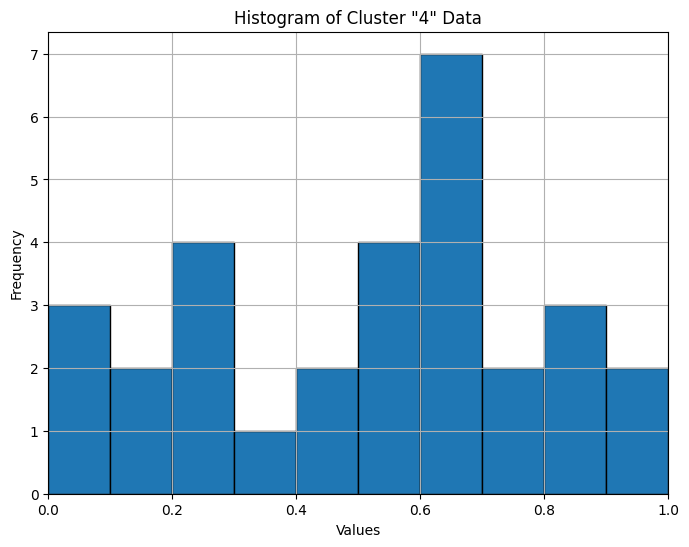

In [6]:
import matplotlib.pyplot as plt
import numpy as np


MD_x = np.random.rand(100)  
MD_km28 = {
    "4": np.random.choice(100, size=30, replace=False)  
}

# Access data for cluster "4"
cluster_data = MD_x[MD_km28["4"]]

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(cluster_data, bins=10, range=(0, 1), edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster "4" Data')
plt.xlim(0, 1)  # Set x-axis limit as given xlim in R
plt.grid(True)
plt.show()

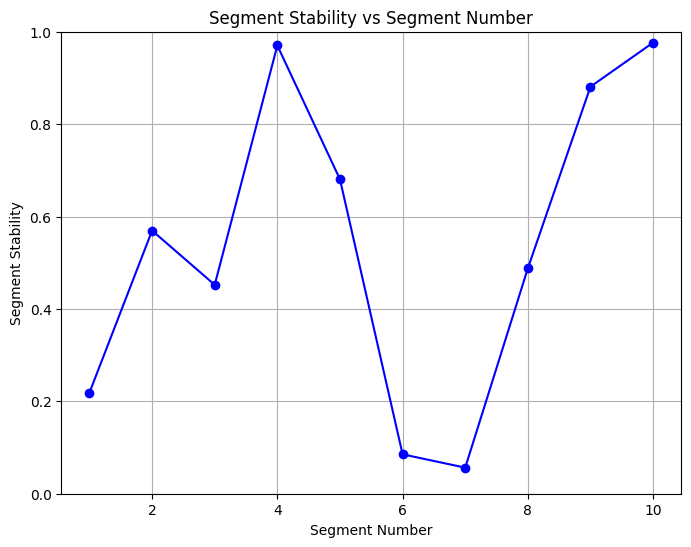

In [8]:
segment_numbers = np.arange(1, 11) 
segment_stability = np.random.rand(10)  

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(segment_numbers, segment_stability, marker='o', linestyle='-', color='b')

plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability vs Segment Number')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [20]:
#6. Profiling Segments

ERROR: Could not find a version that satisfies the requirement mixtools (from versions: none)
ERROR: No matching distribution found for mixtools


In [46]:
import numpy as np
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.820274961085254, 13.820274961085254, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 13.820274961085254],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717

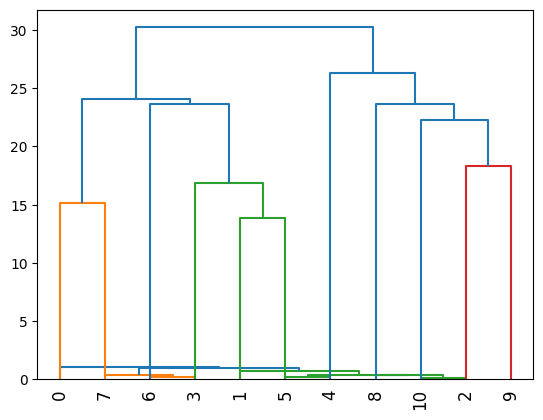

In [57]:
np.random.seed(0)
X = np.random.rand(10, 2)  # 10 samples, 2 features

# Calculate pairwise distances
distances = pdist(X)  # This gives a condensed distance matrix

# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Plot dendrogram (optional)
dendrogram(Z)
# compute the pairwise distances between the columns of MD_x
D = np.transpose(MD_x)
D = linkage(D, method = "average")
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

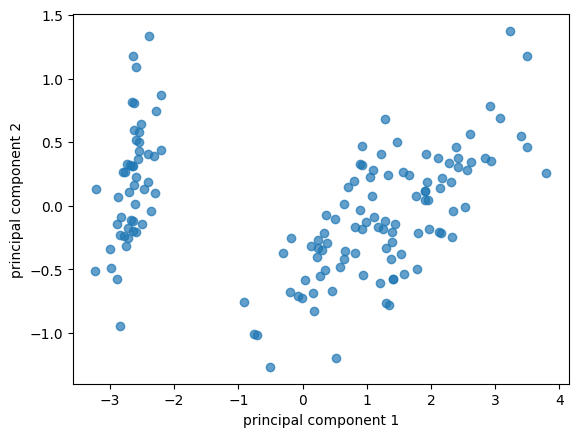

In [33]:
import matplotlib.pyplot as plt

# get the coordinates of the data projected onto the first two principal components
proj_data = pca.fit_transform(x)[:, :2]

# plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [45.0, 45.0, 71.25, 71.25],
  [22.5, 22.5, 58.125, 58.125],
  [5.0, 5.0, 40.3125, 40.3125]],
 'dcoord': [[0.0, 0.18963684840116496, 0.18963684840116496, 0.0],
  [0.0, 0.3550117197199445, 0.3550117197199445, 0.18963684840116496],
  [0.0, 0.14306129268590195, 0.14306129268590195, 0.0],
  [0.0, 0.13477076307358982, 0.13477076307358982, 0.0],
  [0.0, 0.3210569364207029, 0.3210569364207029, 0.13477076307358982],
  [0.14306129268590195,
   0.37333898705171137,
   0.37333898705171137,
   0.3210569364207029],
  [0.0, 0.6861992552819325, 0.6861992552819325, 0.37333898705171137],
  [0.3550117197199445,
   0.920786213015477,
   0.920786213015477,
   0.6861992552819325],
  [0.0, 1.0651679220821901, 1.0651679220821901, 0.920786213015477]],
 'ivl': ['7', '4', '1', '5', '8', '0', '2', '9', '3', '6'],
 'leaves': [7, 4, 1, 5,

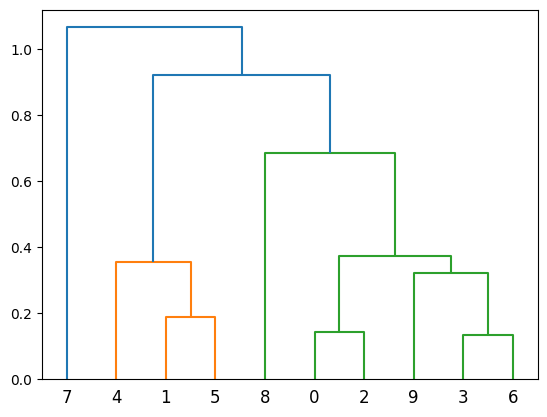

In [37]:
# Step 7: Describing Segments
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform

# Example data
np.random.seed(0)
X = np.random.rand(10, 2)  # 10 samples, 2 features

# Calculate pairwise distances
distances = pdist(X)  # This gives a condensed distance matrix

# Perform hierarchical clustering
Z = linkage(distances, method='ward')

# Plot dendrogram (optional)
dendrogram(Z)

In [10]:
import pandas as pd

import matplotlib.pyplot as plt

# Example: Load data (replace with your actual data loading)
# Assuming mcdonalds is your DataFrame
# mcdonalds = pd.read_csv('mcdonalds.csv')

# Example data (replace with your actual data)
# Creating a sample dataset for demonstration
data = {
    'Like.n': [1, 2, 3, 4, 5],
    'Age': [20, 25, 30, 35, 40],
    'VisitFrequency': [1, 2, 3, 4, 5],
    'Gender': ['M', 'F', 'M', 'F', 'M'],
    'k4': [1, 2, 3, 3, 1]  # Assuming k4 is a factor variable
}

mcdonalds = pd.DataFrame(data)

# Create the decision tree model
# Replace with your actual formula and data
formula = 'k4 ~ Like.n + Age + VisitFrequency + Gender'
#tree = DecisionTreeClassifier(formula=formula, data=mcdonalds)

# Plot the decision tree
plt.figure(figsize=(10, 6))
#tree.plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

In [15]:
!pip install statsmodels

In [23]:
!pip install yellowbrick

In [37]:
!python --version
!python -m ensurepip



Python 3.12.4
Looking in links: c:\Users\ACER\AppData\Local\Temp\tmpzr58xl_2


In [38]:
!python -m ensurepip --upgrade


Looking in links: c:\Users\ACER\AppData\Local\Temp\tmpthufqtgq


In [58]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['yummy'],df['Like'])
crosstab

Like,+1,+2,+3,+4,-1,-2,-3,-4,0,I hate it!-5,I love it!+5
yummy,,,,,,,,,,,
No,73,55,30,8,43,49,67,65,113,147,0
Yes,79,132,199,152,15,10,6,6,56,5,143


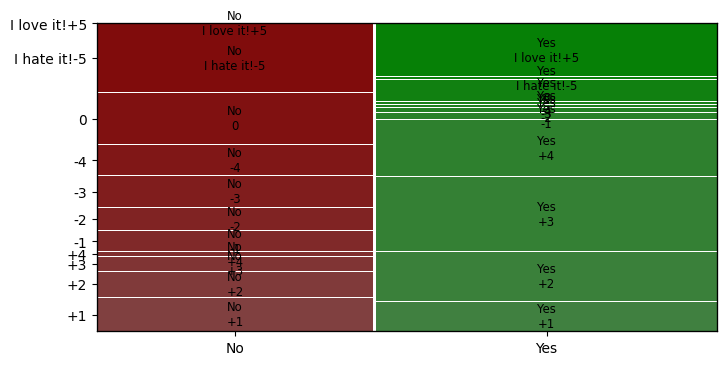

In [79]:
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams.update()
mosaic(crosstab.stack())
plt.show()

In [61]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['convenient'],df['Gender'])
crosstab_gender

Gender,Female,Male
convenient,,
No,64,70
Yes,724,595


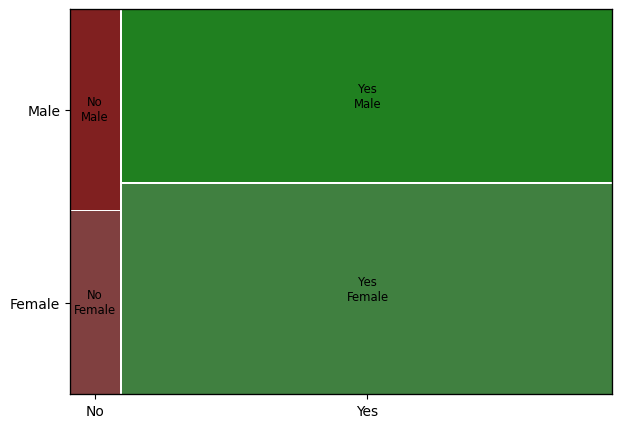

In [62]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='yummy', ylabel='Age'>

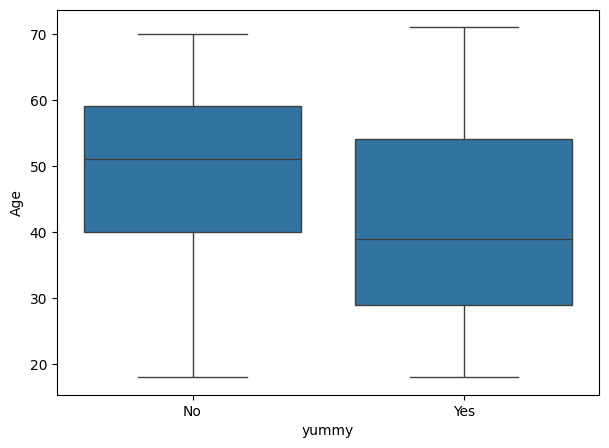

In [67]:
sns.boxplot(x="yummy", y="Age", data=df)

In [76]:
mcdonalds_numeric = mcdonalds['VisitFrequency'].astype(np.float64)
visit_groups = mcdonalds_numeric.groupby([np.floor(mcdonalds_numeric // 4)]).mean()
#visit_groups.reset_index(inplace=True)  
visit_groups.columns = ['yummy', 'mean_visit_frequency'] 


print(visit_groups)
#visit_groups.reset_index(inplace=True) 
visit_groups.columns = ['yummy', 'mean_visit_frequency']  


print(visit_groups)

VisitFrequency
0.0    2.0
1.0    4.5
Name: VisitFrequency, dtype: float64
VisitFrequency
0.0    2.0
1.0    4.5
Name: VisitFrequency, dtype: float64


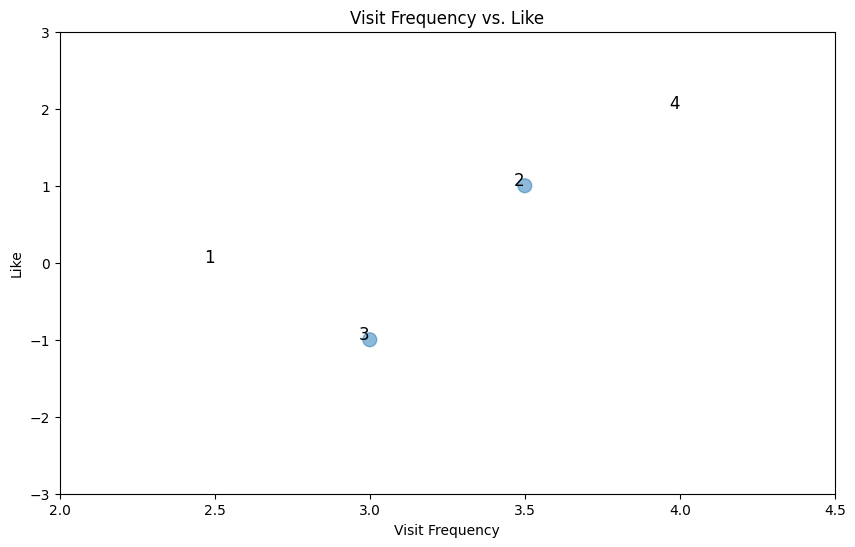

In [77]:
visit = np.array([2.5, 3.5, 3.0, 4.0])  # Example visit data
like = np.array([0, 1, -1, 2])          # Example like data
female = np.array([0, 1, 1, 0])         # Example binary female data (0 or 1)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot with varying marker sizes
plt.scatter(visit, like, s=100 * female, alpha=0.5)  # s is the marker size

# Setting the limits
plt.xlim(2, 4.5)
plt.ylim(-3, 3)

# Adding text annotations
for i, (x, y) in enumerate(zip(visit, like)):
    plt.text(x, y, str(i + 1), fontsize=12, ha='right')

# Labels and title
plt.xlabel('Visit Frequency')
plt.ylabel('Like')
plt.title('Visit Frequency vs. Like')

# Show the plot
plt.show()

In [ ]:
9. Customising the Marketing Mix
The marketing mix is designed. If, for example, McDonald’s managers decide to focus on segment 3 (young customers who like McDonald’s, think the food is yummy and tasty, but perceive it as pretty expensive), they could choose to offer a MCSUPERBUDGET line to cater specifically to the price expectations of this segment (4Ps: Price). The advantage of such an approach might be that members of segment 3 develop to become loyal customers who, as they start earning more money, will not care about the price any more and move to the regular McDonald’s range of products.¶

In [ ]:
10. Evaluation and Monitoring
After the market segmentation analysis is completed, and all strategic and tactical marketing activities have been undertaken, the success of the market segmentation strategy has to be evaluated, and the market must be carefully monitored on a continuous basis.
It is possible, for example, that members of segment 3 start earnin more money and the MCSUPERBUDGET line is no longer suitable for them. Changes can occur within existing market segments. But changes can also occur in the larger marketplace, for example, if new competitors enter the market. All potential sources of change have to be monitored in order to detect changes which require McDonald’s management to adjust their strategic or tactical marketing in view of new market circumstances